Connection to Database


In [6]:
!pip install PyMySQL
import pymysql.cursors
import pandas as pd
import matplotlib.pyplot as plt

host = 'den1.mysql6.gear.host'
db = 'situation'
usr = 'situation'
psword = input("Enter password:")

# Connect to the database
connection = pymysql.connect(host=host, user=usr, password=psword, database=db, cursorclass=pymysql.cursors.DictCursor)


sql = "SELECT * FROM situation.s19_biologicalassays"

with connection.cursor() as cursor:
   cursor.execute(sql)
   results = cursor.fetchall()
   column_names = [desc[0] for desc in cursor.description]  # Get column names from the cursor description

# Initialize an empty DataFrame with the column names
df = pd.DataFrame(columns=column_names)

# Collect all rows in a list
rows = []

# Loop through the fetched results and add each row to the list
for row in results:
   rows.append(pd.Series(row, index=column_names))

# Convert the list of rows to a DataFrame and concatenate it with the initial empty DataFrame
df = pd.concat([df, pd.DataFrame(rows)], ignore_index=True)


connection.close()
print(df)



Enter password:aichem567.
   assay_id compound_name    target  assay_type measurement_type  \
0         1     CompoundA  ProteinX     Binding               Kd   
1         2     CompoundB  ProteinY  Inhibition             IC50   
2         3     CompoundC  ProteinZ  Activation             EC50   
3         4     CompoundD  ProteinA     Binding               Kd   
4         5     CompoundE  ProteinB  Inhibition             IC50   
5         6     CompoundF  ProteinC  Activation             EC50   
6         7     CompoundG  ProteinD     Binding               Kd   
7         8     CompoundH  ProteinE  Inhibition             IC50   
8         9     CompoundI  ProteinF  Activation             EC50   
9        10     CompoundJ  ProteinG     Binding               Kd   
10       11     CompoundK  ProteinH  Inhibition             IC50   
11       12     CompoundL  ProteinI  Activation             EC50   
12       13     CompoundM  ProteinJ     Binding               Kd   
13       14     Compou

Implementation of Neural Network MLP

In [20]:
# Change the datatype to use it in MLP
print(df.dtypes)
df['assay_id'] = df['assay_id'].astype(int)
# Drop date since there is no dependency on that
df = df.drop('date_performed', axis=1)

# Convert to 'category' dtype first
df['compound_name'] = df['compound_name'].astype('category')
df['target'] = df['target'].astype('category')
df['assay_type'] = df['assay_type'].astype('category')
df['measurement_type'] = df['measurement_type'].astype('category')
df['notes'] = df['notes'].astype('category')

# Then convert categories to their corresponding codes
df['compound_name'] = df['compound_name'].cat.codes
df['target'] = df['target'].cat.codes
df['assay_type'] = df['assay_type'].cat.codes
df['measurement_type'] = df['measurement_type'].cat.codes
df['notes'] = df['notes'].cat.codes


print(df.dtypes)

assay_id                     int64
compound_name                 int8
target                        int8
assay_type                    int8
measurement_type              int8
assay_result               float64
efficacy_class            category
date_performed      datetime64[ns]
notes                         int8
dtype: object
assay_id               int64
compound_name           int8
target                  int8
assay_type              int8
measurement_type        int8
assay_result         float64
efficacy_class      category
notes                   int8
dtype: object


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np


# Check for missing values
print(df.isnull().sum())
# Prepare the data
X = df.drop('assay_result', axis=1)  # Only use numeric columns as features
print(X)
y = df['assay_result']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = mlp.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



assay_id            0
compound_name       0
target              0
assay_type          0
measurement_type    0
assay_result        0
efficacy_class      0
notes               0
dtype: int64
    assay_id  compound_name  target  assay_type  measurement_type  \
0          1              0      23           1                 2   
1          2              6      24           2                 1   
2          3              7      25           0                 0   
3          4              8       0           1                 2   
4          5              9       1           2                 1   
5          6             10       2           0                 0   
6          7             11       3           1                 2   
7          8             12       4           2                 1   
8          9             13       5           0                 0   
9         10             14       6           1                 2   
10        11             15       7           2     

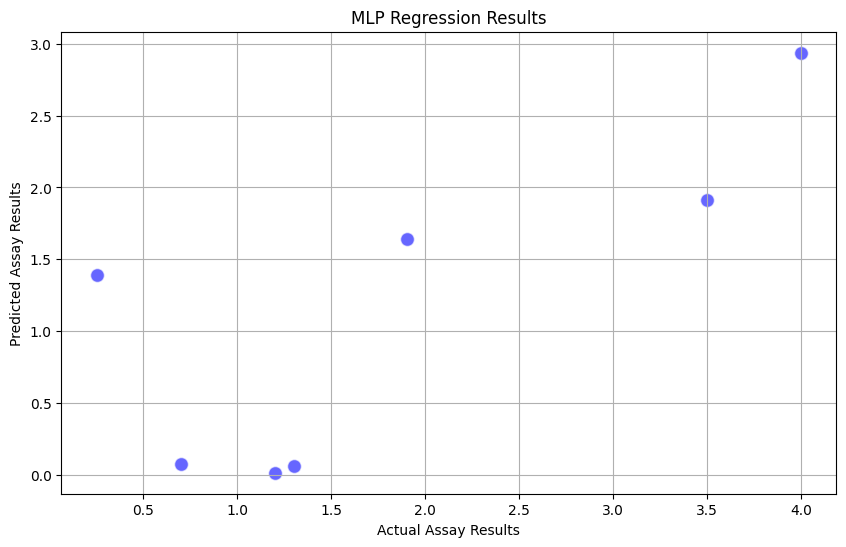

In [22]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolor='w', s=100)
plt.xlabel('Actual Assay Results')
plt.ylabel('Predicted Assay Results')
plt.title('MLP Regression Results')
plt.grid(True)
plt.show()